# Import software libraries and load the dataset #

In [27]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sb                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
- NumPy 1.23.5
- pandas 1.5.3
- Matplotlib 3.6.3
- scikit-learn 1.3.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
df['Target']= iris.target
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Examine a general summary of statistics

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Identify outliers

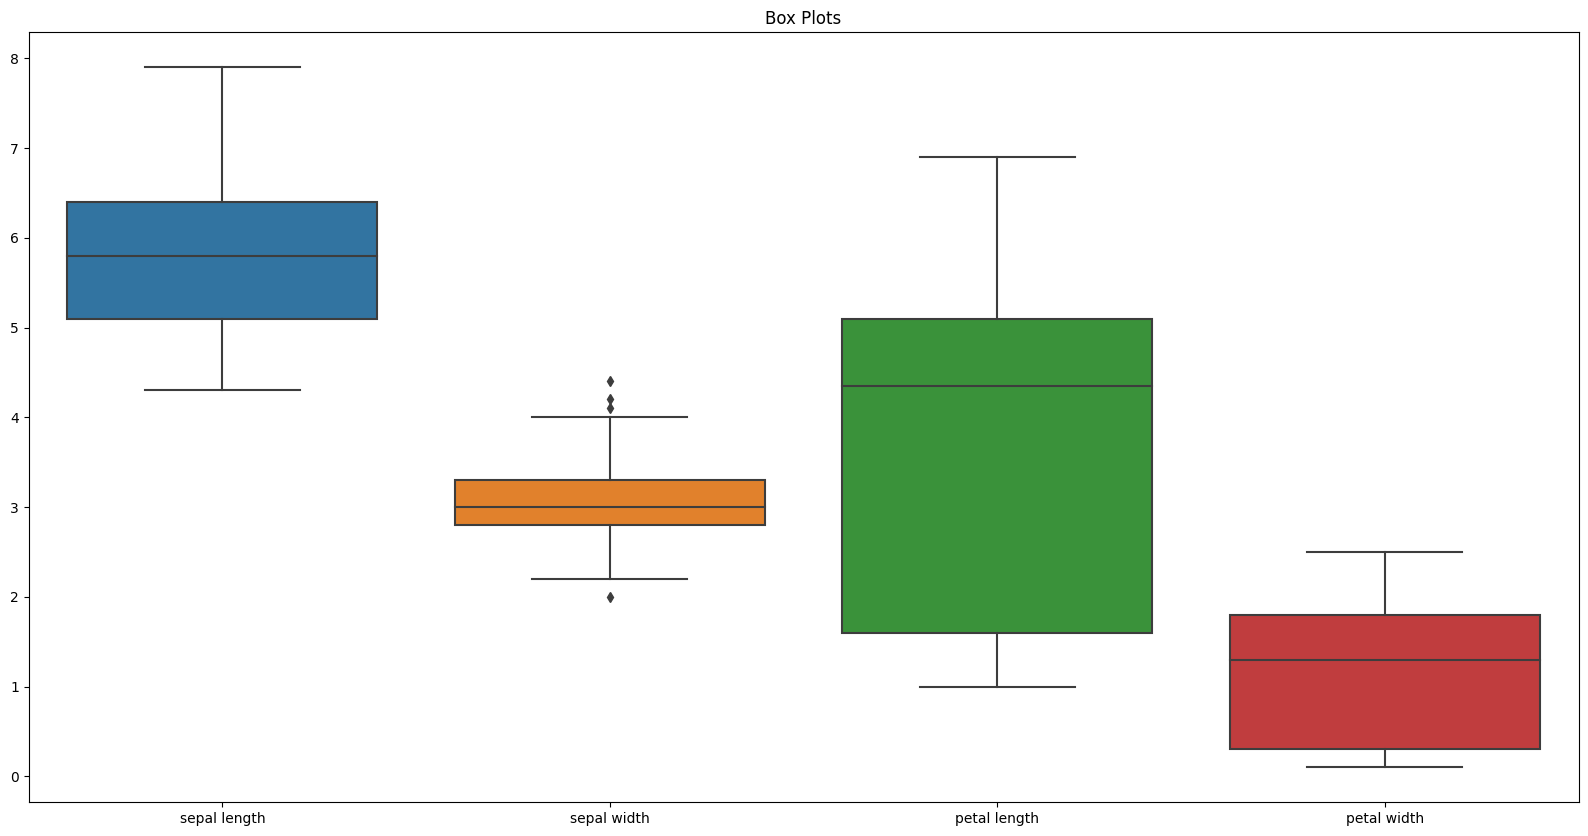

In [30]:
import seaborn as sns

data = [
    df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'],
    df['petal width (cm)'],
]

labels = [
    'sepal length', 'sepal width', 'petal length', 'petal width',
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [31]:
df = df.drop(df[df['Target'] == 2].index)


# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

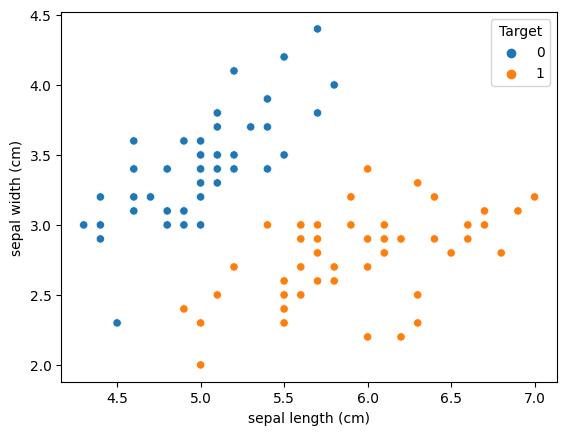

In [32]:
sns.scatterplot( data=df, x='sepal length (cm)', y='sepal width (cm)', color='red',hue='Target')


Coefficients (w) :  [-0.15363085]
Intercept    (b) :  3.9395143980630873


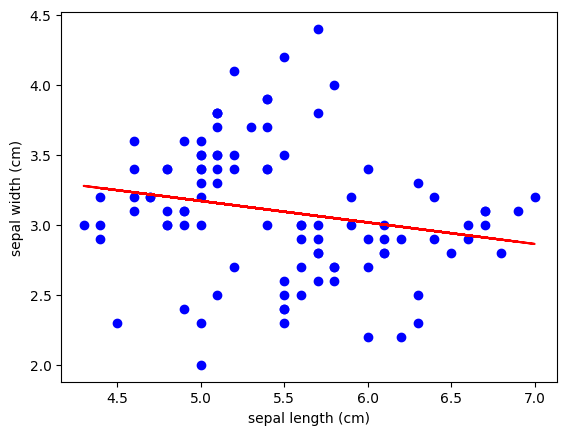

In [33]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
x = df[['sepal length (cm)']]
y = df['sepal width (cm)']
regr.fit(x,y )

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

plt.scatter(x, y,  color='blue')
ll = regr.coef_[0] * x + regr.intercept_
plt.plot(x, ll, '-r')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show();


# Plot a decision boundary for a given model

# Train a basic logistic regression model and plot its decision boundary

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

model = LogisticRegression()
model.fit(x, y)


x = df[['sepal length (cm)']]
y = df['sepal width (cm)']
model.fit(x,y )

print ('Coefficients (w) : ', model.coef_)
print ('Intercept    (b) : ',model.intercept_)

plt.scatter(x, y,  color='blue')
ll = model.coef_[0] * x + model.intercept_
plt.plot(x, ll, '-r')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.show();

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

NameError: name 'X' is not defined

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

# Split the datasets

# Evaluate an SVM model using a holdout test set